In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dolfin import *

In [9]:
mesh = RectangleMesh(
    Point(-1., -1.),
    Point(1., 1.),
    10, 10
)

In [10]:
el = FiniteElement("P", mesh.ufl_cell(), 1)
element = MixedElement([el, el])
W = FunctionSpace(mesh, element)

In [11]:
f = Expression("exp(-(x[0] * x[0] + x[1]*x[1]) / (b*b))", b=Constant(0.5), degree=1)

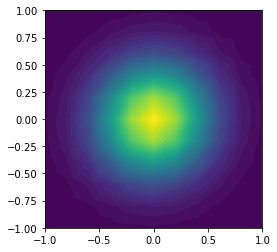

In [12]:
plot(f, mesh=mesh)

In [44]:
u0.sub(0)

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 2), FiniteElement('Lagrange', triangle, 1)), 198)

In [53]:
%pwd

'/home/jorgen/Dropbox/code/pantarei/notebooks'

In [57]:
# c0 = Function(W.sub(0).collapse())
# g0 = interpolate(c0, W.sub(1).collapse())
u0 = Function(W)
c0, g0 = split(u0)
u0.sub(0).assign(project(f, W.sub(0).collapse()))
u0.sub(1).assign(project(f, W.sub(1).collapse()))


c, g = TrialFunctions(W)
v, w = TestFunctions(W)

D = Constant(1.)
dt = 0.1
n = FacetNormal(mesh)


a = (
    (c * v  - dt * D * inner(grad(c), grad(v))) * dx
    + ((dt * g * v) + (g + dt * D * inner(grad(c), n))*w) * ds
)
F = c0 * v * dx + g0 * w * ds

concentration = File("concentration.pvd")
boundaries = File("boundaries.pvd")

u = Function(W)
for i in range(100):
    solve(a == F, u)
    u0.assign(u)
    c, g = u.split(True)
    concentration << c
    boundaries << g 

            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational problem.
            Solving linear variational p